In [1]:

 from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Import Libraries

In [2]:

import pandas as pd
import os

#### Load the Data

In [3]:
import pandas as pd

# Load the cleaned 2007-2020 dataset from the CSV
df_2007_2020_clean = pd.read_csv('/content/drive/My Drive/df_2007_2020_clean.csv')

# Load the cleaned 2021-2022 dataset from the CSV file
df_2021_2022_clean = pd.read_csv('/content/drive/My Drive/df_2021_2022_clean.csv')

In [4]:


# Select columns with non-numeric data types
categorical_cols = df_2007_2020_clean.select_dtypes(include=['object', 'category']).columns


for col in df_2007_2020_clean.select_dtypes(include=['int64', 'float64']).columns:
    if len(df_2007_2020_clean[col].unique()) < 10:
        categorical_cols = categorical_cols.append(pd.Index([col]))

# Print out the categorical columns
print(categorical_cols)


Index(['SYSTEM', 'DATE', 'SEVERITY', 'ROAD_DESC', 'CONTOUR', 'CONDITION',
       'LIGHTING', 'WEATHER', 'LIMIT1', 'RUCODE', 'MHE', 'VEHICLE_1',
       'DRIVER_1', 'FACTOR_1', 'VEH_MOVE_1', 'SEX_1', 'CITY', 'COUNTY',
       'REGION'],
      dtype='object')


In [5]:
# Select columns with non-numeric data types
categorical_cols1 = df_2021_2022_clean.select_dtypes(include=['object', 'category']).columns

for col in df_2021_2022_clean.select_dtypes(include=['int64', 'float64']).columns:
    if len(df_2021_2022_clean[col].unique()) < 10:  # the threshold can be adjusted
        categorical_cols1 = categorical_cols1.append(pd.Index([col]))

# Print out the categorical columns
print(categorical_cols1)

Index(['SYSTEM', 'DATE', 'SEVERITY', 'ROAD_DESC', 'CONTOUR', 'CONDITION',
       'LIGHTING', 'WEATHER', 'LIMIT1', 'RUCODE', 'MHE', 'VEHICLE_1',
       'DRIVER_1', 'FACTOR_1', 'VEH_MOVE_1', 'SEX_1', 'CITY', 'COUNTY',
       'INJURY 02', 'REGION'],
      dtype='object')


#### Using one-hot encoding 'get dummy' function
- changing catagorical variable to numeric

In [6]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Combine datasets to ensure consistent encoding
combined_df = pd.concat([df_2007_2020_clean, df_2021_2022_clean], sort=False)

# One-hot encoding
one_hot_cols = ['SYSTEM', 'ROAD_DESC', 'CONDITION', 'LIGHTING', 'WEATHER', 'CONTOUR', 'RUCODE', 'MHE', 'VEHICLE_1', 'DRIVER_1', 'FACTOR_1', 'VEH_MOVE_1', 'CITY', 'COUNTY']
combined_df_encoded = pd.get_dummies(combined_df, columns=one_hot_cols)

# Label encoding for any ordinal categories or high cardinality nominal categories
label_encoder = LabelEncoder()
label_cols = ['SEX_1', 'REGION']
for col in label_cols:
    combined_df_encoded[col] = label_encoder.fit_transform(combined_df_encoded[col].astype(str))

# Split the combined dataset back into training and testing sets
df_2007_2020_encoded = combined_df_encoded[:len(df_2007_2020_clean)]
df_2021_2022_encoded = combined_df_encoded[len(df_2007_2020_clean):]




In [7]:
# Use pandas get_dummies for one-hot encoding
df_2007_2020_encoded = pd.get_dummies(df_2007_2020_encoded, columns=['REGION'])
df_2021_2022_encoded = pd.get_dummies(df_2021_2022_encoded, columns=['REGION'])

# Ensure both dataframes have the same set of columns after encoding,
missing_cols = set(df_2007_2020_encoded.columns) - set(df_2021_2022_encoded.columns)
for c in missing_cols:
    df_2021_2022_encoded[c] = 0

missing_cols = set(df_2021_2022_encoded.columns) - set(df_2007_2020_encoded.columns)
for c in missing_cols:
    df_2007_2020_encoded[c] = 0

# Align the order of columns in both dataframes
df_2007_2020_encoded, df_2021_2022_encoded = df_2007_2020_encoded.align(df_2021_2022_encoded, axis=1)


- **One-Hot Encoding:** I transformed the 'REGION' column in both datasets (df_2007_2020_encoded and df_2021_2022_encoded) into multiple binary columns using pandas.get_dummies.
- **Ensuring Consistency:** I added missing columns to each dataset to ensure they both have the same set of features. Missing columns were filled with zeros.
- **Aligning Column Order:** I aligned the order of columns in both dataframes to ensure they match, which is essential for consistent data handling and analysis.

In [8]:
# Assuming df_2007_2020_encoded is your dataset
X_train = df_2007_2020_encoded.drop('SEVERITY', axis=1)  # I'm dropping the target variable to get the features
y_train = df_2007_2020_encoded['SEVERITY']  # The target variable



- **Extract Features:** I created X_train by removing the 'SEVERITY' column from df_2007_2020_encoded. This dataframe now contains only the features (independent variables) used for training the machine learning model.
- **Extract Target Variable:** I created y_train which contains only the 'SEVERITY' column from df_2007_2020_encoded. This series holds the target variable (dependent variable) that your model will predict.

In [9]:
# Convert 'DATE' to datetime if it's in string format and extract year, month, and day
if 'DATE' in X_train.columns:
    X_train['DATE'] = pd.to_datetime(X_train['DATE'])
    X_train['YEAR'] = X_train['DATE'].dt.year
    X_train['MONTH'] = X_train['DATE'].dt.month
    X_train['DAY'] = X_train['DATE'].dt.day
    X_train = X_train.drop('DATE', axis=1)  # Drop the original 'DATE' column if no longer needed

# One-hot encode categorical variables if they exist
categorical_columns = X_train.select_dtypes(include=['object', 'category']).columns
X_train = pd.get_dummies(X_train, columns=categorical_columns)

# Now let's retry the feature selection
from sklearn.feature_selection import SelectKBest, f_classif

# Define the number of features you want to keep
k = 10  # or adjust based on your preference

selector = SelectKBest(score_func=f_classif, k=k)
X_train_selected = selector.fit_transform(X_train, y_train)

selected_features = X_train.columns[selector.get_support()]
print(f"Selected features using ANOVA F-test: {selected_features.tolist()}")



/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [56] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Selected features using ANOVA F-test: ['INJURY 00', 'INJURY 01', 'INJURY 02', 'INJURY 03', 'MHE_BICYCLE', 'MHE_OVERTURNING', 'MHE_PEDESTRIAN', 'MHE_SIDESWIPE (SAME DIRECTION)', 'MHE_UNKNOWN', 'VEHICLE_1_MOTORCYCLE']


- **Date Conversion:** I converted data from a string to a datetime format and extracted the year, month, and day into separate columns. I then removed the original 'DATE' column.
- **One-Hot Encoding:** I encoded categorical variables in X_train using one-hot encoding to turn categorical data into numerical format suitable for machine learning.
- **Feature Selection:** I applied SelectKBest with the ANOVA F-test as the score function to select the top 10 features that have the highest correlation with the target variable y_train.
- **Output Selected Features:** Finally, I printed the names of the selected features.

### Modeling Phase

### Random Forest Classifier

#### Step 1: Prepare the Data
I need to ensure that both the training and testing datasets contain only the features selected during the feature selection phase. I will also extract the target variable SEVERITY from both datasets.

In [10]:

# Extract the selected features from both datasets
selected_features = ['INJURY 00', 'INJURY 01', 'INJURY 02', 'INJURY 03', 'MHE_BICYCLE', 'MHE_OVERTURNING', 'MHE_PEDESTRIAN', 'MHE_SIDESWIPE (SAME DIRECTION)', 'MHE_UNKNOWN', 'VEHICLE_1_MOTORCYCLE']

X_train = df_2007_2020_encoded[selected_features]
y_train = df_2007_2020_encoded['SEVERITY']

X_test = df_2021_2022_encoded[selected_features]
y_test = df_2021_2022_encoded['SEVERITY']


####Step 2: Train the Model
I will train a Random Forest Classifier using the training data.

In [11]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

####Step 3: Evaluate the Model
After training the model, I will evaluate its performance on the testing data to see how well it generalizes to new, unseen data.

In [12]:
from sklearn.metrics import classification_report, accuracy_score

# Predict on the testing set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

         FAT       0.66      0.32      0.43       575
         INJ       0.99      1.00      1.00     36169
         PDO       1.00      1.00      1.00    103275

    accuracy                           1.00    140019
   macro avg       0.88      0.77      0.81    140019
weighted avg       1.00      1.00      1.00    140019

Accuracy Score:
0.9965219005992044



The model's performance metrics indicate a high overall accuracy score of approximately 99.65%. However, when I look closer at the precision, recall, and f1-score for each class, there's a noticeable difference:

FAT (Fatalities): This class has much lower precision and recall compared to the other classes, indicating the model struggles to correctly predict fatal accidents.
INJ (Injuries) and PDO (Property Damage Only): The model performs exceptionally well in predicting these classes, as indicated by the near-perfect scores.

####1. Addressing Class Imbalance
Class imbalance can significantly affect model performance, particularly for minority classes. I can use techniques like SMOTE (Synthetic Minority Over-sampling Technique) to balance the dataset.

In [13]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE()

# Resample the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the balance
print(y_train_resampled.value_counts())


SEVERITY
PDO    768981
INJ    768981
FAT    768981
Name: count, dtype: int64


It looks like I've successfully balanced the classes using an oversampling technique such as SMOTE, resulting in an equal number of instances for the PDO, INJ, and FAT categories in my training data. This is a significant step in addressing class imbalance and should help improve the model's performance, especially for the minority classes.

####2. Hyperparameter Tuning
I can use grid search or random search to find the optimal hyperparameters for the Random Forest model.

In [14]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter distributions
param_distributions = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [10, 15, 20, 25, None],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4]
}

# Initialize the randomized search
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_distributions,
    n_iter=3,
    cv=3,
    random_state=42,
    scoring='f1_macro',
    n_jobs=-1   # Use all available cores to speed up the process
)

# Fit the randomized search to the resampled data
random_search.fit(X_train_resampled, y_train_resampled)

# Get the best estimator and parameters
best_rf = random_search.best_estimator_
print("Best parameters found:", random_search.best_params_)



Best parameters found: {'n_estimators': 250, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_depth': None}


- **Defined Parameter Ranges:** I set up a range for parameters like n_estimators, max_depth, min_samples_split, and min_samples_leaf.
- **Setup Randomized Search:** Configured and initiated a randomized search to test 3 different combinations of parameters across 3-fold cross-validation, optimizing for macro F1 score, and using all available CPU cores.
- **Fit and Evaluate:** I fitted the model on resampled data to handle class imbalance and then extracted the best model and its parameters after the search.

####Model Re-evaluation
After applying the above strategies, I should re-evaluate the model performance on the testing set.

In [15]:
# Predict on the testing set using the best model from hyperparameter tuning
y_pred = best_rf.predict(X_test)

# Evaluate the model
print("Revised Classification Report:")
print(classification_report(y_test, y_pred))


Revised Classification Report:
              precision    recall  f1-score   support

         FAT       0.08      0.73      0.14       575
         INJ       1.00      0.93      0.96     36169
         PDO       1.00      0.98      0.99    103275

    accuracy                           0.96    140019
   macro avg       0.69      0.88      0.70    140019
weighted avg       1.00      0.96      0.98    140019



- **Prediction:** I generated predictions (y_pred) for the test data using the best_rf model.
- **Evaluation:** I printed a classification report showing metrics like precision, recall, and F1-score for each class (FAT, INJ, PDO) and overall model accuracy.
Key Results:

- **FAT (Fatalities):** Low precision (0.08) but high recall (0.73), indicating many false positives but a good capture rate of actual fatalities.
- **INJ and PDO:** Both categories had high precision and recall, indicating excellent performance.
- **Overall Accuracy:** The model has a high accuracy of 96% with some performance imbalance noted in the FAT category.







### 1. Logistic Regression

- **Model Setup:** I will initializ a logistic regression model with a high number of iterations (1000) to ensure convergence.
- **Model Training:** Then I will train the model using resampled data (X_train_resampled, y_train_resampled), likely adjusted to handle class imbalance.
- **Prediction:** I will predict crash severity categories on the test set (X_test).
- **Evaluation:** I evaluate the model's performance and generated a classification report, which includes precision, recall, and F1-scores for each crash severity category (FAT, INJ, PDO) along with overall accuracy.

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Initialize the model
log_reg = LogisticRegression(max_iter=1000)

# Fit the model
log_reg.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate the model
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

         FAT       0.05      0.73      0.09       575
         INJ       1.00      0.83      0.91     36169
         PDO       1.00      0.98      0.99    103275

    accuracy                           0.94    140019
   macro avg       0.68      0.85      0.66    140019
weighted avg       0.99      0.94      0.96    140019



- **FAT (Fatalities):** The precision for fatalities is quite low at 0.05, indicating a high rate of false positives. However, the recall is relatively high at 0.73, suggesting that the model can capture a significant portion of actual fatalities.
- **INJ (Injuries):** The model performs well in predicting injuries, with a precision of 1.00 and recall of 0.83, resulting in a high F1-score of 0.91.
- **PDO (Property Damage Only):** Similar to injuries, the model shows excellent precision (1.00) and recall (0.98), leading to a high F1-score of 0.99.
- **Overall Performance:** The weighted average F1-score is 0.96, indicating good overall performance. However, the model's ability to predict fatalities needs improvement due to the low precision.

####2.LightGBM
LightGBM is a gradient boosting framework that is known for its efficiency and speed. Here's how you can use it for your classification task:

- **Model Setup and Training**: I will initializ a LightGBM classifier and trained it using resampled data to address class imbalance.
- **Prediction and Evaluation**: I will predict the test set and generated a classification report, reviewing metrics like precision, recall, and F1-score for each severity category (FAT, INJ, PDO).

In [17]:
from lightgbm import LGBMClassifier

# Initialize the LightGBM model
lgbm_classifier = LGBMClassifier()

# Fit the model
lgbm_classifier.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred_lgbm = lgbm_classifier.predict(X_test)

# Evaluate the model
print("LightGBM Classification Report:")
print(classification_report(y_test, y_pred_lgbm))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.126472 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 63
[LightGBM] [Info] Number of data points in the train set: 2306943, number of used features: 10
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
LightGBM Classification Report:
              precision    recall  f1-score   support

         FAT       0.08      0.72      0.15       575
         INJ       1.00      0.94      0.97     36169
         PDO       1.00      0.98      0.99    103275

    accuracy                           0.97    140019
   macro avg       0.69      0.88      0.70    140019
weighted avg       1.00      0.97      0.98    

**Key Insights from the Report**:
- **FAT (Fatalities)**: Low precision but high recall, indicating many false positives but good detection of actual cases.
- **INJ and PDO**: Both showed high precision and recall, indicating excellent model performance for these categories.
- **Overall Accuracy**: Achieved 97%, demonstrating effective model performance with high precision and recall across most categories.

####3.Decision Tree

I will apply a decision tree classifier to predict and evaluate crash severity categories:

- **Model Setup and Training:** I initializ a decision tree classifier and trained it on resampled data, which is intended to mitigate class imbalance.
- **Prediction and Evaluation:** After training, I will use the model to predict the test set and generated a classification report.

In [18]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree model
dt_classifier = DecisionTreeClassifier()

# Fit the model
dt_classifier.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the model
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))


Decision Tree Classification Report:
              precision    recall  f1-score   support

         FAT       0.08      0.74      0.14       575
         INJ       1.00      0.93      0.96     36169
         PDO       1.00      0.98      0.99    103275

    accuracy                           0.96    140019
   macro avg       0.69      0.88      0.70    140019
weighted avg       1.00      0.96      0.98    140019



- **FAT (Fatalities):** Exhibited low precision (0.08) but high recall (0.74), indicating the model identifies most true fatalities but also mislabels many non-fatalities as fatal.
- **INJ (Injuries) and PDO (Property Damage Only):** Both categories showed high precision and recall, reflecting strong model performance for these outcomes.
- **Overall Performance:** The model achieved an overall accuracy of 96%, with a macro average F1-score of 0.70 and a weighted average F1-score of 0.98, suggesting solid performance across most categories but with room for improvement in accurately identifying fatalities.








####4. Naive Bayes classifier

I will implement a Naive Bayes classifier using the GaussianNB model to predict and evaluate crash severity categories:

- **Model Setup and Training:** I will Initializ a Gaussian Naive Bayes model and trained it on resampled data to handle class imbalance effectively.
- **Prediction and Evaluation:** Then predictions on the test dataset and generated a classification report to assess model performance.

In [19]:
from sklearn.naive_bayes import GaussianNB

# Initialize the Naive Bayes model
nb_classifier = GaussianNB()

# Fit the model
nb_classifier.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred_nb = nb_classifier.predict(X_test)

# Evaluate the model
print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))


Naive Bayes Classification Report:
              precision    recall  f1-score   support

         FAT       0.05      0.60      0.09       575
         INJ       0.98      0.85      0.91     36169
         PDO       1.00      0.98      0.99    103275

    accuracy                           0.95    140019
   macro avg       0.68      0.81      0.66    140019
weighted avg       0.99      0.95      0.97    140019



- **FAT:** Showed very low precision (0.05) but a relatively high recall (0.60), indicating that while the model is good at identifying actual fatalities, it also incorrectly labels many non-fatalities as fatal, leading to a high false positive rate.
- **INJ and PDO:** Both had high precision and recall, with PDO nearly perfect, indicating excellent model performance for these more frequent categories.
- **Overall Performance:** The model achieved an overall accuracy of 95%, with macro and weighted average F1-scores at 0.66 and 0.97 respectively, suggesting good performance, especially for non-fatal categories, but less accuracy in predicting fatalities due to a high rate of false positives.

**Summary:**

**Best Overall Performance:** LightGBM and Decision Tree models have the best overall performance based on the weighted average F1-score (0.98).

**Fatalities Prediction:** Decision Tree shows a slightly better balance between precision and recall for predicting fatalities compared to Logistic Regression, LightGBM, and Naive Bayes.

**Injuries and PDO:** All models perform exceptionally well in predicting injuries and property damage only, with F1-scores close to or at 1.00.

**Considerations for Improvement:**

- Focus on improving the prediction of fatalities, especially in models with low precision for this class.
- Further fine-tuning of hyperparameters and exploring feature engineering techniques may lead to better model performance.
- Overall, the Decision Tree model stands out for its balanced performance across all classes, but LightGBM also performs excellently and is known for its efficiency and speed, making it a strong contender as well.

#### Saving the Models

In [20]:
from joblib import dump, load

# Save each model
dump(rf_classifier, 'random_forest.joblib')
dump(log_reg, 'logistic_regression.joblib')
dump(lgbm_classifier, 'lightgbm.joblib')
dump(dt_classifier, 'decision_tree.joblib')
dump(nb_classifier, 'naive_bayes.joblib')


['naive_bayes.joblib']

I will conduct a multi-class ROC analysis for a Random Forest model using a OneVsRestClassifier approach.

What I will do is:

- binariz combined class labels for ROC compatibility and re-split them into training and test sets.
- wrap the Random Forest classifier in a OneVsRestClassifier to handle multi-class data.
- defined a function to compute and plot ROC curves for each class.
- calculate false positive rates, true positive rates, and AUC values.
- Visualize ROC curves for each class using distinct colors.
- Predict class probabilities on the test set.
- Plot the ROC curves using the computed probabilities to assess model performance across classes.

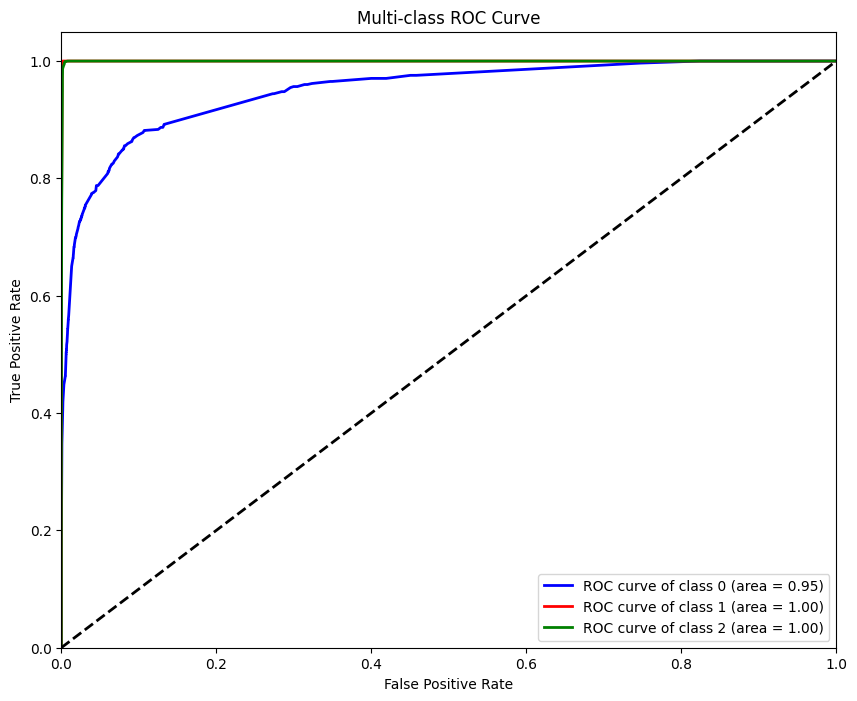

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Ensure that numpy is imported
import numpy as np

# Binarize the output classes
y_combined = pd.concat([y_train, y_test])  # Use concat for combining Series
classes = np.unique(y_combined)
y_bin = label_binarize(y_combined, classes=classes)
n_classes = y_bin.shape[1]

# Split the data back into train and test sets
y_train_bin = y_bin[:len(y_train), :]
y_test_bin = y_bin[len(y_train):, :]

# OneVsRestClassifier with your Random Forest model
ovr_rf_classifier = OneVsRestClassifier(rf_classifier)
ovr_rf_classifier.fit(X_train, y_train_bin)

# Function to plot ROC curve for each class
def plot_multiclass_roc(y_test, y_score, n_classes, figsize=(10, 8)):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=figsize)
    colors = ['blue', 'red', 'green', 'yellow', 'purple', 'cyan', 'magenta']
    for i, color in zip(range(n_classes), colors[:n_classes]):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Multi-class ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

# Predict probabilities for each class
y_score = ovr_rf_classifier.predict_proba(X_test)

# Plot ROC curve
plot_multiclass_roc(y_test_bin, y_score, n_classes)



The ROC curves suggest that my models have distinguished between the classes quite well. Here’s a breakdown of what these results mean:

**Class 0 (Blue Curve):** The AUC of 0.95 is very high, which indicates that the model has a strong ability to differentiate between class 0 and the other classes. There is a small margin for error, but overall, this is a strong performance.

**Class 1 (Green Curve) and Class 2 (Red Curve):** Both of these classes have AUCs of 1.00, which is as high as possible. This means the model has perfectly distinguished these classes from the others without any false positives or false negatives.

### Pattern analysis, visualization, and insights generation

#### Step 1: Correlation Analysis
I'll first generate a heatmap to visualize the correlations between numeric features.

In [23]:
!pip install seaborn

In [24]:
import seaborn as sns

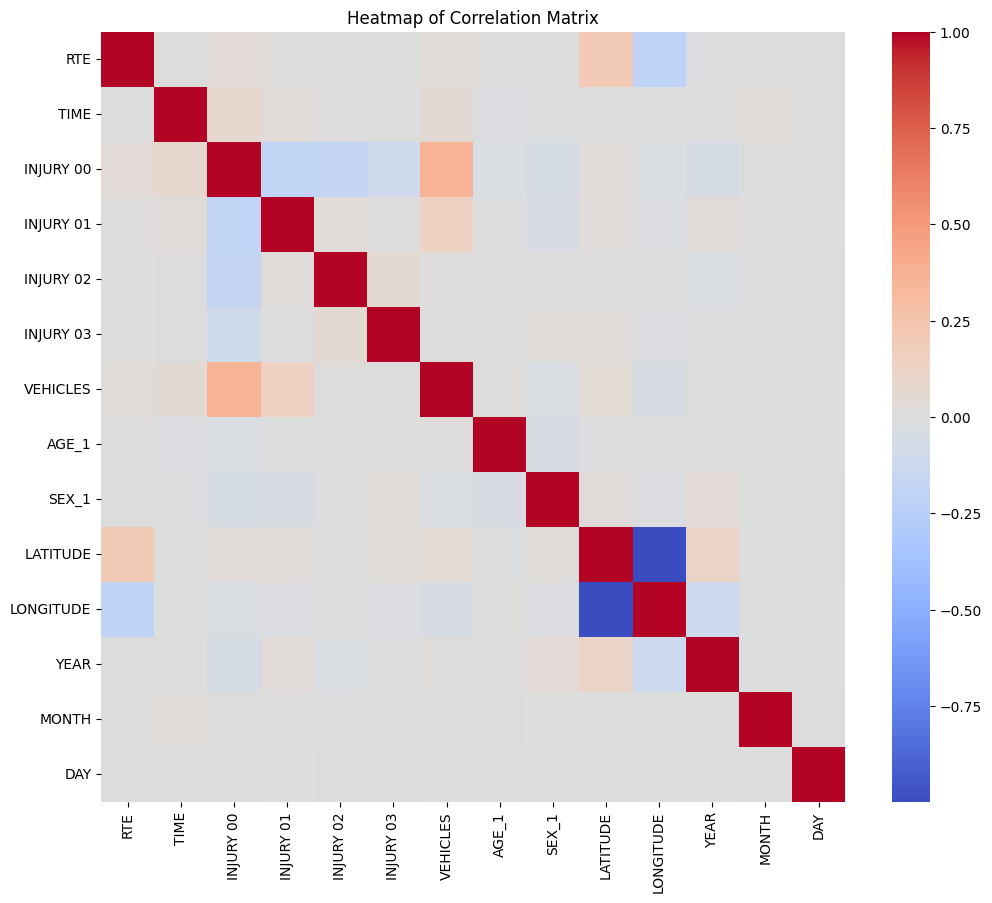

In [25]:
# Column named 'DATE', convert it to datetime and extract parts
if 'DATE' in df_2007_2020_encoded.columns:
    df_2007_2020_encoded['DATE'] = pd.to_datetime(df_2007_2020_encoded['DATE'])
    df_2007_2020_encoded['YEAR'] = df_2007_2020_encoded['DATE'].dt.year
    df_2007_2020_encoded['MONTH'] = df_2007_2020_encoded['DATE'].dt.month
    df_2007_2020_encoded['DAY'] = df_2007_2020_encoded['DATE'].dt.day
    # Now you can drop the original 'DATE' column as it's non-numeric
    df_2007_2020_encoded = df_2007_2020_encoded.drop('DATE', axis=1)

# Exclude non-numeric columns from the correlation matrix
numeric_cols = df_2007_2020_encoded.select_dtypes(include=[np.number])
corr_matrix = numeric_cols.corr()

# Now I can create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()


 'INJURY_00' and 'VEHICLES' show a near red color, this could indicate that more severe injuries are associated with crashes involving a greater number of vehicles.

#### Step 2: Trend Analysis
Look for trends over time, such as crash frequencies by year, month, or day of the week.

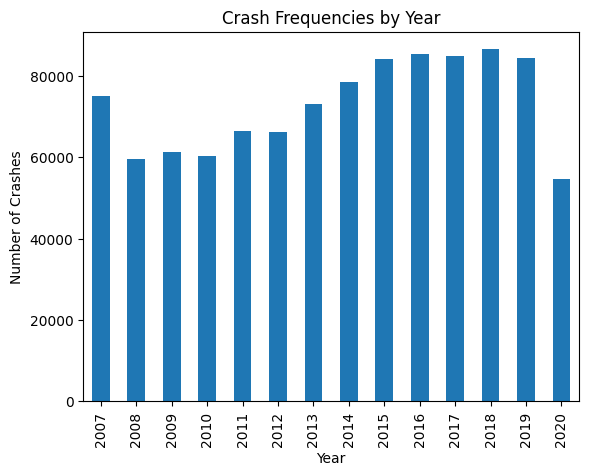

In [26]:
# Plotting the number of crashes by year
df_2007_2020_encoded['YEAR'].value_counts().sort_index().plot(kind='bar')
plt.title('Crash Frequencies by Year')
plt.xlabel('Year')
plt.ylabel('Number of Crashes')
plt.show()


The bar chart shows the frequency of crashes for each year.
- There’s a visible trend here: starting from 2007, there’s a general increase in the number of crashes, reaching a peak around 2017-2018, after which there is a notable decrease in 2020.

- This decline in 2020 probably be related to external factor which is reduced travel due to the COVID-19 pandemic.

#### Step 3: Crashes by Severity for each Region

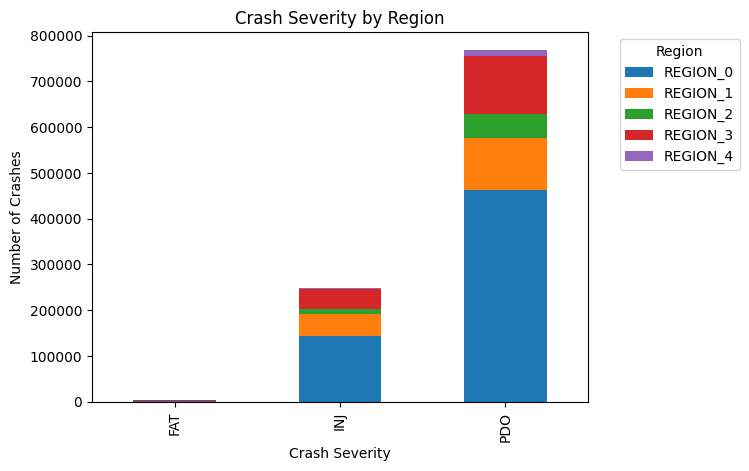

In [28]:
# Plotting the number of crashes by severity for each region
severity_region_df = df_2007_2020_encoded.groupby('SEVERITY')[['REGION_0', 'REGION_1', 'REGION_2', 'REGION_3', 'REGION_4']].sum()
severity_region_df.plot(kind='bar', stacked=True)
plt.title('Crash Severity by Region')
plt.xlabel('Crash Severity')
plt.ylabel('Number of Crashes')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

- As I can see, the stacked bar chart presents crash severities by region effectively. It looks like the PDO category has the highest number of crashes across all regions, which is a common trend as these incidents are usually more frequent but less severe than others.

- The Fatalities category has significantly fewer incidents in comparison, but it’s a crucial focus area because each incident represents a loss of life. It appears that REGION_0 and REGION_1 have a lower number of fatal crashes compared to other regions, which could be a point of interest for further investigation.

- REGION_2, REGION_3, and REGION_4 might require more attention and targeted safety measures since they show a higher number of severe crashes.

####From here, I want to:

Examine the factors that contribute to the higher number of crashes.
Investigate if certain regions have better infrastructure or safety programs that could explain the lower number of fatal crashes.
Explore the demographic or geographic characteristics that might influence these patterns.
Consider the impact of traffic volume and road usage patterns across different regions.

#### Step 4: Patterns of Fatality Crashes

In [38]:
print(df_2007_2020_encoded.columns.tolist())


['RTE', 'TIME', 'SEVERITY', 'INJURY 00', 'INJURY 01', 'INJURY 02', 'INJURY 03', 'VEHICLES', 'LIMIT1', 'AGE_1', 'SEX_1', 'LATITUDE', 'LONGITUDE', 'SYSTEM_CITY STREET', 'SYSTEM_FRONTAGE ROAD', 'SYSTEM_INTERSTATE', 'SYSTEM_STATE HIGHWAY', 'SYSTEM_UNKNOWN/PRIVATE', 'ROAD_DESC_AT DRIVEWAY ACCESS', 'ROAD_DESC_AT INTERSECTION', 'ROAD_DESC_IN ALLEY', 'ROAD_DESC_INTERSECTION RELATED', 'ROAD_DESC_NON-INTERSECTION', 'ROAD_DESC_PARKING LOT', 'ROAD_DESC_RAMP', 'ROAD_DESC_ROUNDABOUT', 'ROAD_DESC_UNKNOWN', 'CONDITION_DRY', 'CONDITION_DRY W/VIS ICY ROAD TREATMENT', 'CONDITION_FOREIGN MATERIAL', 'CONDITION_ICY', 'CONDITION_ICY W/VIS ICY ROAD TREATMENT', 'CONDITION_MUDDY', 'CONDITION_SLUSHY', 'CONDITION_SLUSHY W/VIS ICY ROAD TREATMENT', 'CONDITION_SNOWY', 'CONDITION_SNOWY W/VIS ICY ROAD TREATMENT', 'CONDITION_UNKNOWN', 'CONDITION_WET', 'CONDITION_WET W/VIS ICY ROAD TREATMENT', 'LIGHTING_DARK-LIGHTED', 'LIGHTING_DARK-UNLIGHTED', 'LIGHTING_DAWN OR DUSK', 'LIGHTING_DAYLIGHT', 'LIGHTING_UNKNOWN', 'WEATHER_D

In [35]:
fatal_crashes = df_2007_2020_encoded[df_2007_2020_encoded['SEVERITY'] == 'FAT']

#### Based on Crash Types

* I will plot barchart to understand which collision types lead to the most fatalities which can help in identifying patterns and common factors in fatal crashes.

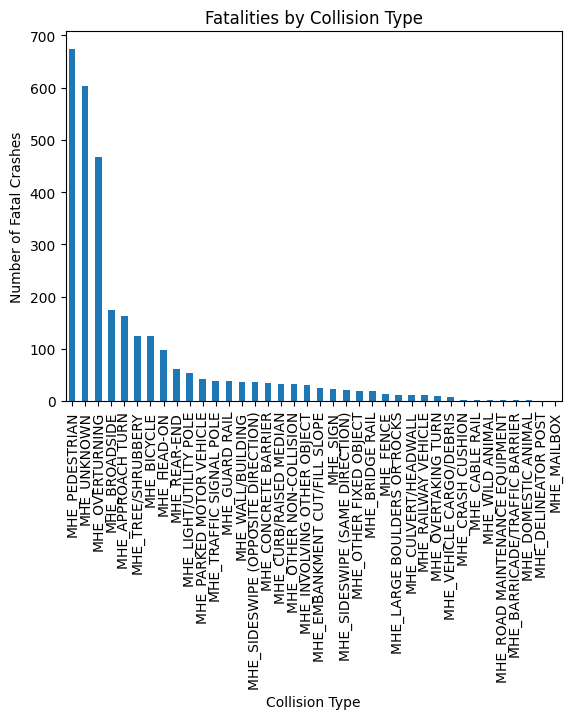

In [39]:
import matplotlib.pyplot as plt

# Aggregating counts of different MHE types
mhe_columns = [col for col in df_2007_2020_encoded.columns if 'MHE_' in col]
mhe_fatal_counts = fatal_crashes[mhe_columns].sum().sort_values(ascending=False)

# Plotting
mhe_fatal_counts.plot(kind='bar', title='Fatalities by Collision Type')
plt.xlabel('Collision Type')
plt.ylabel('Number of Fatal Crashes')
plt.show()



It displays the number of fatal crashes for various collision mechanisms, indicated by bars of varying heights. Here's my interpretation:

- **Highest Fatalities:** The chart shows that collisions involving pedestrians have the highest number of fatalities, significantly more than other types.
- **Trend:** There is a decreasing trend in fatalities as you move from the most to the least common types, highlighting the varied risk associated with different collision scenarios.
- **Implications:** The data suggests a need for targeted safety measures, especially for pedestrian safety, and can help prioritize interventions and resource allocation by identifying the most lethal collision types.

#### Based on Weathers

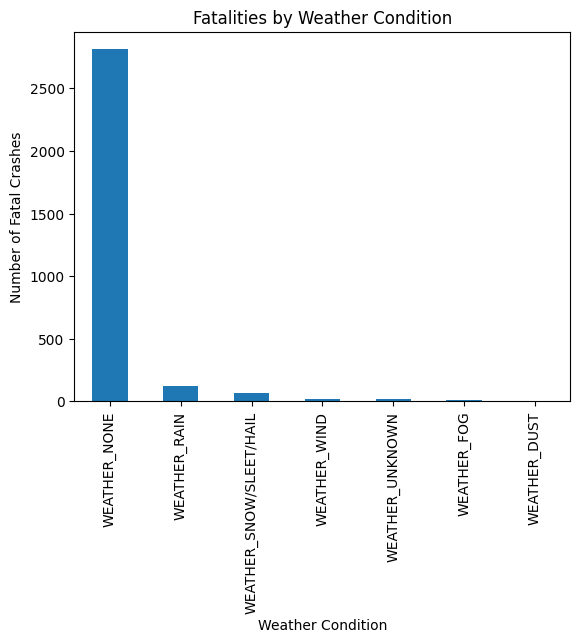

In [40]:
weather_columns = [col for col in df_2007_2020_encoded.columns if 'WEATHER_' in col]
weather_fatal_counts = fatal_crashes[weather_columns].sum().sort_values(ascending=False)

weather_fatal_counts.plot(kind='bar', title='Fatalities by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Fatal Crashes')
plt.show()


#### Based on Road Condition

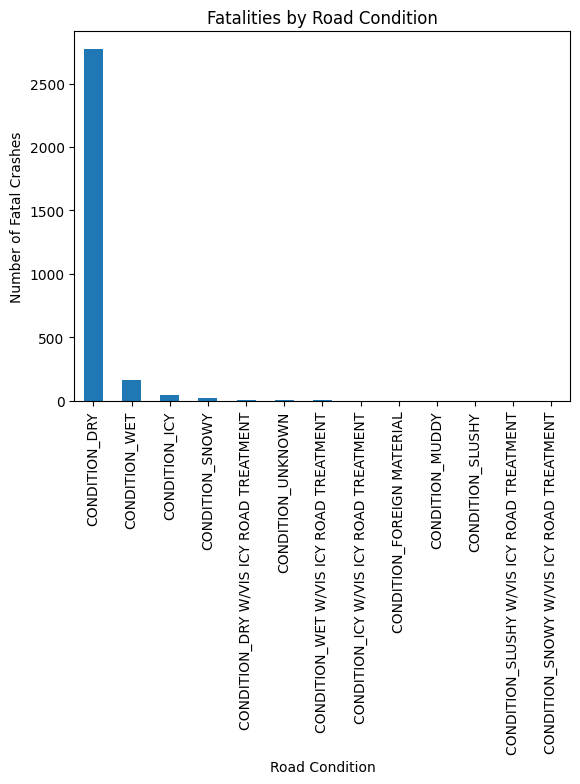

In [41]:
condition_columns = [col for col in df_2007_2020_encoded.columns if 'CONDITION_' in col]
condition_fatal_counts = fatal_crashes[condition_columns].sum().sort_values(ascending=False)

condition_fatal_counts.plot(kind='bar', title='Fatalities by Road Condition')
plt.xlabel('Road Condition')
plt.ylabel('Number of Fatal Crashes')
plt.show()



The bar chart shows that the majority of fatal crashes occur in clear weather, with significantly fewer fatalities in adverse weather conditions like rain, snow, and fog. This suggests that clear weather, likely due to higher traffic volumes and potentially riskier driving behaviors, sees more fatal accidents than expected. This is crucial for targeting safety measures effectively, even during seemingly safe weather conditions.

#### Based on Months

<ipython-input-47-11a3e6c8530e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_fatalities.index, y=monthly_fatalities.values, palette="viridis")


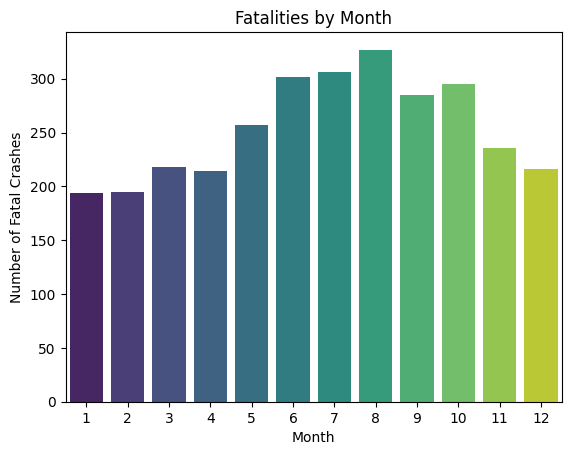

In [47]:
# Assuming 'MONTH' is already extracted as a separate column
import seaborn as sns

# Aggregate fatalities by month and plot
monthly_fatalities = fatal_crashes.groupby('MONTH').size()

sns.barplot(x=monthly_fatalities.index, y=monthly_fatalities.values, palette="viridis")
plt.title('Fatalities by Month')
plt.xlabel('Month')
plt.ylabel('Number of Fatal Crashes')
plt.show()




The bar chart illustrates the number of fatal crashes distributed across different months of the year:

- **Trend:** The chart shows a general increase in fatal crashes starting from May (Month 5) through October (Month 10), with peak numbers in the warmer months.
- **Seasonal Variation:** The higher number of fatalities during the warmer months might be attributed to increased travel and recreational activities during this period.
- **Decline:** There's a noticeable decline in fatalities in the colder months, particularly from November to February, which might be due to less travel or more cautious driving in winter conditions.

#### Based on the Influence of Alcohol or Drugs

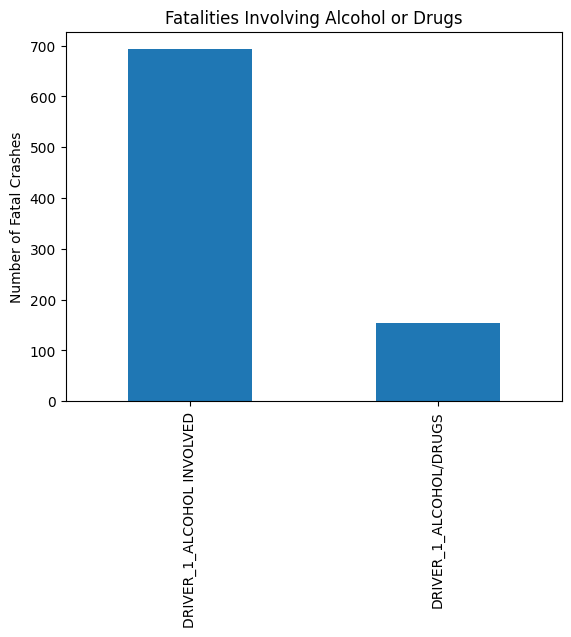

In [48]:
# Analyzing the influence of alcohol or drugs
alcohol_drug_influence = fatal_crashes[['DRIVER_1_ALCOHOL INVOLVED', 'DRIVER_1_ALCOHOL/DRUGS']].sum()

alcohol_drug_influence.plot(kind='bar', title='Fatalities Involving Alcohol or Drugs')
plt.ylabel('Number of Fatal Crashes')
plt.show()


The bar chart titled displays the number of fatal crashes involving either alcohol or both alcohol and drugs. Here’s how I interpret the data:

- **Alcohol Involvement:** The first bar represents fatal crashes where alcohol was involved but not necessarily drugs. This bar is significantly higher, indicating that alcohol alone is a major factor in many fatal crashes.
- **Combined Alcohol and Drugs:** The second bar shows fatal crashes involving both alcohol and drugs. This count is considerably lower, suggesting that the combination is less frequent but still concerning.
- **Key Insight:** The substantial difference between the two bars highlights the predominant role that alcohol plays in fatal accidents, compared to the combination of alcohol and drugs.